In [0]:
import numpy as np
import random 
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [0]:
!pip install qpsolvers

In [0]:
from qpsolvers import solve_qp

ModuleNotFoundError: ignored

###  Use solve_qp to solve the Quadratic Programming problem in SVM and compare the result directly from SVM in scikit-learn

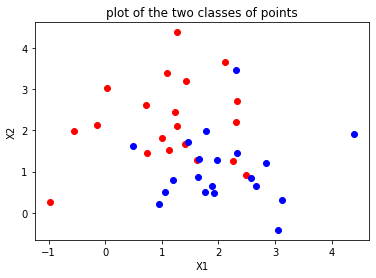

In [0]:
# first generate and plot the data 
# generate red and green dots from two Gaussian distribution
N=20
np.random.seed(10)
X0 = np.ones((N,1))
# Red dots with mean (1,2), y for red dots be 1
# Blue dots with mean(2,1), y for blue dots be -1
X1=np.random.multivariate_normal([1,2],[[1,0], [0,1]], size=N)
y1=np.ones((N,1))
y2=np.zeros((N,1))-np.ones((N,1))
X2=np.random.multivariate_normal([2,1],[[1,0], [0,1]], size=N)
Redx=np.hstack((X0,X1))
Bluex=np.hstack((X0,X2))
# combine two classes of dots
X=np.concatenate((X1,X2))
Xqp=np.concatenate((Redx, Bluex))
y=np.concatenate((y1,y2))
# plot these dots
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.title("plot of the two classes of points")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### SVM from scikit-learn

In [0]:
SVMsl=SVC(kernel='linear', C=1.0)
SVMsl.fit(X, y.ravel())
print ("coef of SVM from scikit-learn is ", [SVMsl.coef0,SVMsl.coef_[0][0], SVMsl.coef_[0][1]])

coef of SVM from scikit-learn is  [0.0, -1.0010134006643083, 1.2121109158079257]


### SVM from Quadratic Programming

Here we minimize $1/2 ||\beta||^2 + C(\sum_{i=1}^n \xi_i)$ \\
subject to $y_i(x^T\beta+\beta_0) \geq 1-\xi_i, i = 1, \dots, n$, and $\xi_i \geq 0, i=1, \dots, n $

We are trying to rewrite the problem in following format:
minimize $1/2 x^TPx + q^x$ w.r.t. $x$, \\
subject to $Gx\leq h$ \\

In [0]:
# get the number of parameters in beta, including beta_0
nbeta=Xqp.shape[1]
# get total number of samples
nsample=Xqp.shape[0]
# create P, P=T.transpose(T)
T1=np.identity(nbeta)
# change the first line of T1 be all zero
T1[0,0]=0
T2=np.zeros((nsample, nbeta))
T=np.concatenate((T1,T2))
P=T@T.T

In [0]:
# create q
# q= np.concatenate((q1, q2))
# define cost C
C=1
q1=np.zeros((nbeta))
q2=C*np.ones((nsample))
q= np.concatenate((q1, q2))

In [0]:
# create G, G=np.concatenate(Q, O)
# Q=Q1-Q2
Q11=np.zeros((nsample,nbeta))
Q12=np.identity(nsample)
Q1=-np.hstack((Q11, Q12))
Q21=y*Xqp
Q22=np.zeros((nsample,nsample))
Q2=np.hstack((Q21, Q22))
Q=Q1-Q2
# O=Q1
G=np.concatenate((Q, Q1))

In [0]:
# create h
# h = np.concatenate((h1, h2))
h1=-np.ones((nsample))
h2=np.zeros((nsample))
h = np.concatenate((h1, h2))

In [0]:
# SVM from quadratic programming
print ("QP solution:", solve_qp(P=P, q=q, G=G, h=h))

NameError: ignored

In [0]:
#P.shape
q.shape
#Q1
#Q2.shape
#h
G.shape

(80, 43)

In [0]:
from numpy import array, dot
from qpsolvers import solve_qp

M = array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
P = dot(M.T, M)  # quick way to build a symmetric matrix
q = dot(array([3., 2., 3.]), M).reshape((3,))
G = array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
h = array([3., 2., -2.]).reshape((3,))
A = array([1., 1., 1.])
b = array([1.])

print ("QP solution:", solve_qp(P, q, G, h))

ModuleNotFoundError: ignored

In [0]:
np.all(np.linalg.eigvals(P) >= 0)

True

In [0]:
np.allclose(P, P.T)

True

In [0]:
import cvxopt
cvxopt.solvers.qp(P, q, G, h, meq=0)

ValueError: ignored